# Linear Regression Project

The scenario is this: an eCommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 

In [12]:
# Science imports
import pandas as pd
import numpy as np
# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns
# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default. 
sns.set_style("darkgrid") # set a grey grid as a background
# ML imports
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# turn off warnings
import warnings
warnings.filterwarnings('ignore')




### Data Examination

Using the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [14]:
customers = pd.read_csv("Ecommerce Customers")

### Examining the dataframe 

In [16]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [17]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [18]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Use seaborn to create a 2d jointplot to compare the Time on Website vs Time on App with Yearly Amount Spent columns.**

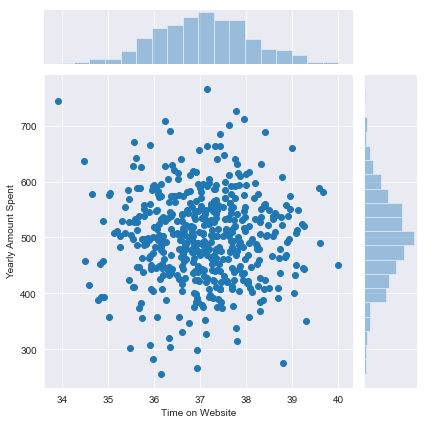

In [19]:
sns.jointplot(x=customers['Time on Website'],y=customers['Yearly Amount Spent'],data=customers)

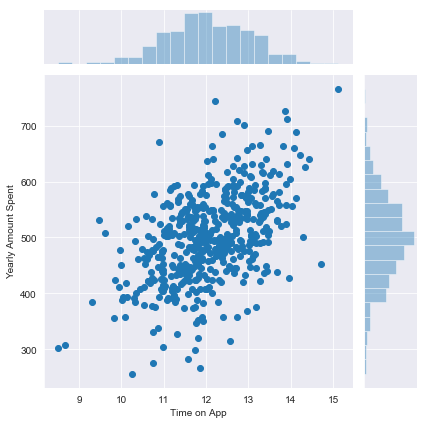

In [20]:
sns.jointplot(x=customers['Time on App'],y=customers['Yearly Amount Spent'],data=customers)

**Visualize Time On WebSite vs Time On App with 2d Hexplots**

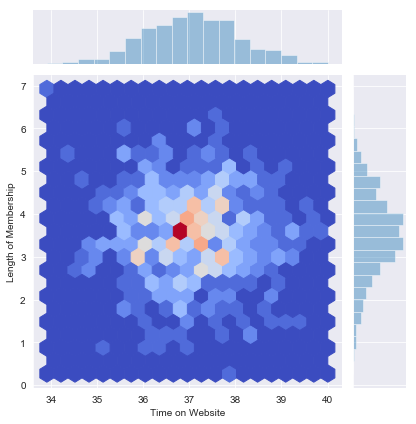

In [47]:
sns.jointplot(x=customers['Time on Website'],y=customers['Length of Membership'],data=customers,kind="hex",cmap='coolwarm')

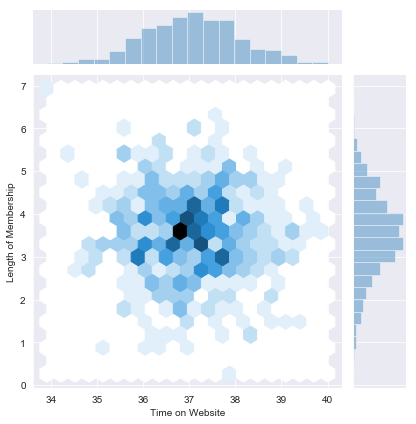

In [48]:
sns.jointplot(x=customers['Time on Website'],y=customers['Length of Membership'],data=customers,kind="hex")

**exploring these types of relationships across the entire data set.**

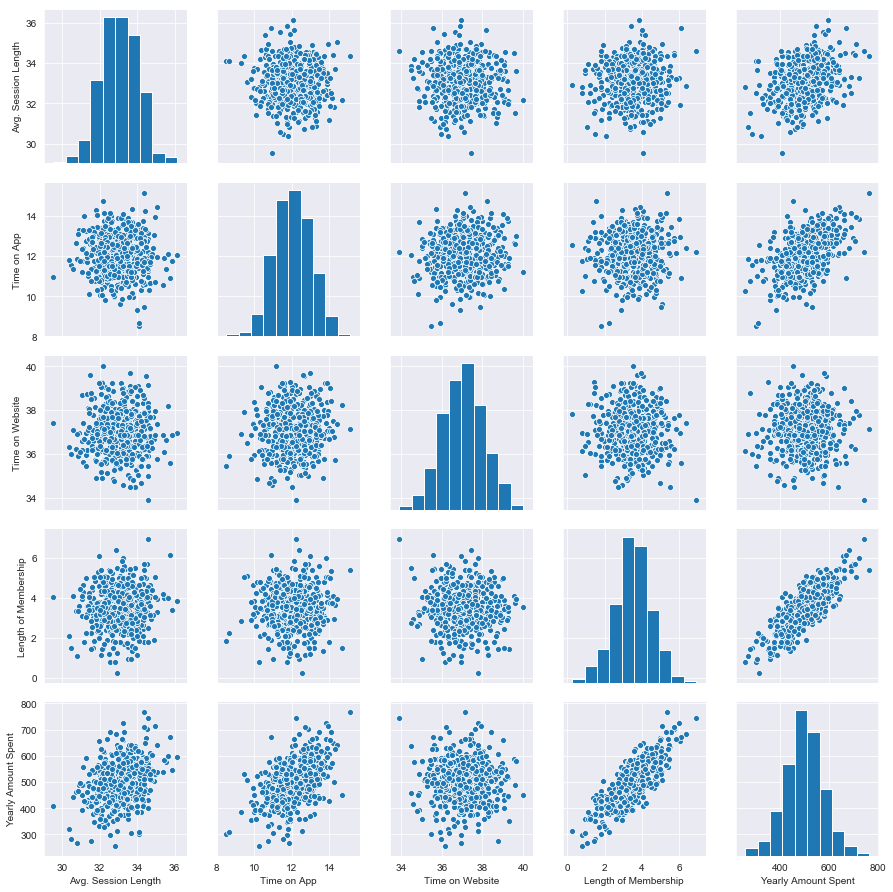

In [25]:
sns.pairplot(customers)

It's easy to visualize that the most Correlated feature with **Yearly Amount Spent** is **Length of Membership**

**Displaying this correlation with Seaborn's linear model plot**

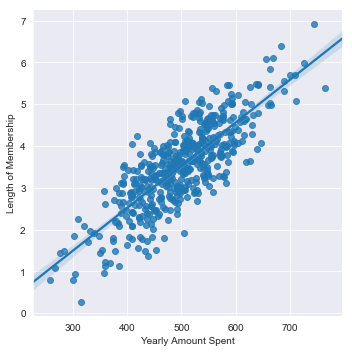

In [27]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customers)

### Creating Training and Testing Data

In [29]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [28]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [32]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y=customers['Yearly Amount Spent']

**splitting the data into training and testing sets with test_size=0.3 and random_state=101**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Training the model on our training data

**Create an instance of a LinearRegression() model named lm.**

In [34]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [35]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Print out the coefficients of the model**

In [36]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
 Now to evaluate the model's performance by predicting off from the Testing Values

In [37]:
predictions = lm.predict(X_test)

**Visualize with a scatterplot of the real test values versus the predicted values.**

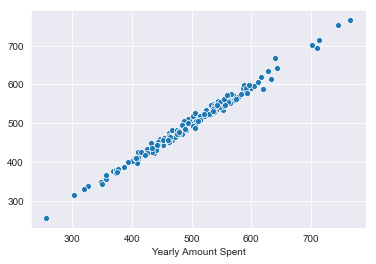

In [38]:
sns.scatterplot(y_test,predictions)

## Evaluating the Model

Now to valuate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE: 7.228148653430834
MSE: 79.81305165097447
RMSE: 2.6885216483098726


**R-squared** - *how much variance the model contains*

**In general, the higher the R-squared, the better the model fits the data**

In [63]:
# getting r-squared for y_test, and predictions
print("R-Squared Value for y_test and predictions is: ",metrics.explained_variance_score(y_test,predictions))

R-Squared Value for y_test and predictions is:  0.9890771231889607


## Residuals

The model fit very well (over 98%). Now to review the residuals to make sure everything was okay with the data. To do this we'll plot a histogram to make sure it looks normally distributed. 


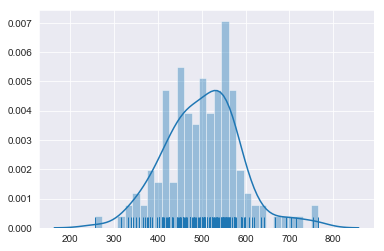

In [45]:
sns.distplot(predictions,rug=True, bins=30)

**Give the data, do we recommend the client focus efforts on mobile app or website development?**

We can add certainty Analyzing by the Coefficient:

In [64]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns=['CoEfficient']) #Label the column

In [65]:
cdf

,CoEfficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpretation:
- For every unit of Length of Membership, they get a return of \$61.27 by far the biggest return per dollar spent.
- For every unit of Time On App, there is a return of \$38.59 of improvement for yearly amount spent. Mobile users contribute more to the bottom line than Web users
- For every unit of Session Length, they get a return of \$25.98 of improvement. Keep the customers on longer.
- For every unit of Time On Website they get a return of \$.19 - the worst return. 

**Resources are clearly best spent to improve the mobile app experience, and keep customers on longer**